<a href="https://colab.research.google.com/github/vigneshsharma1997/NLP_Model/blob/main/NLP_Authors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [3]:
url = 'https://raw.githubusercontent.com/vigneshsharma1997/NLP_Model/main/authors%20(1).csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [6]:
df.shape

(19579, 3)

##**Bar Chart Class**

In [12]:
EAP = df[df['author']=='EAP'].shape[0]

In [14]:
HPL = df[df['author']=='HPL'].shape[0]

In [15]:
MWS = df[df['author']=='MWS'].shape[0]

In [21]:
print(df[df['author']=='EAP'].shape)
print(df[df['author']=='HPL'].shape)
print(df[df['author']=='MWS'].shape)

(7900, 3)
(5635, 3)
(6044, 3)


Text(0.5, 1.0, 'Proportion')

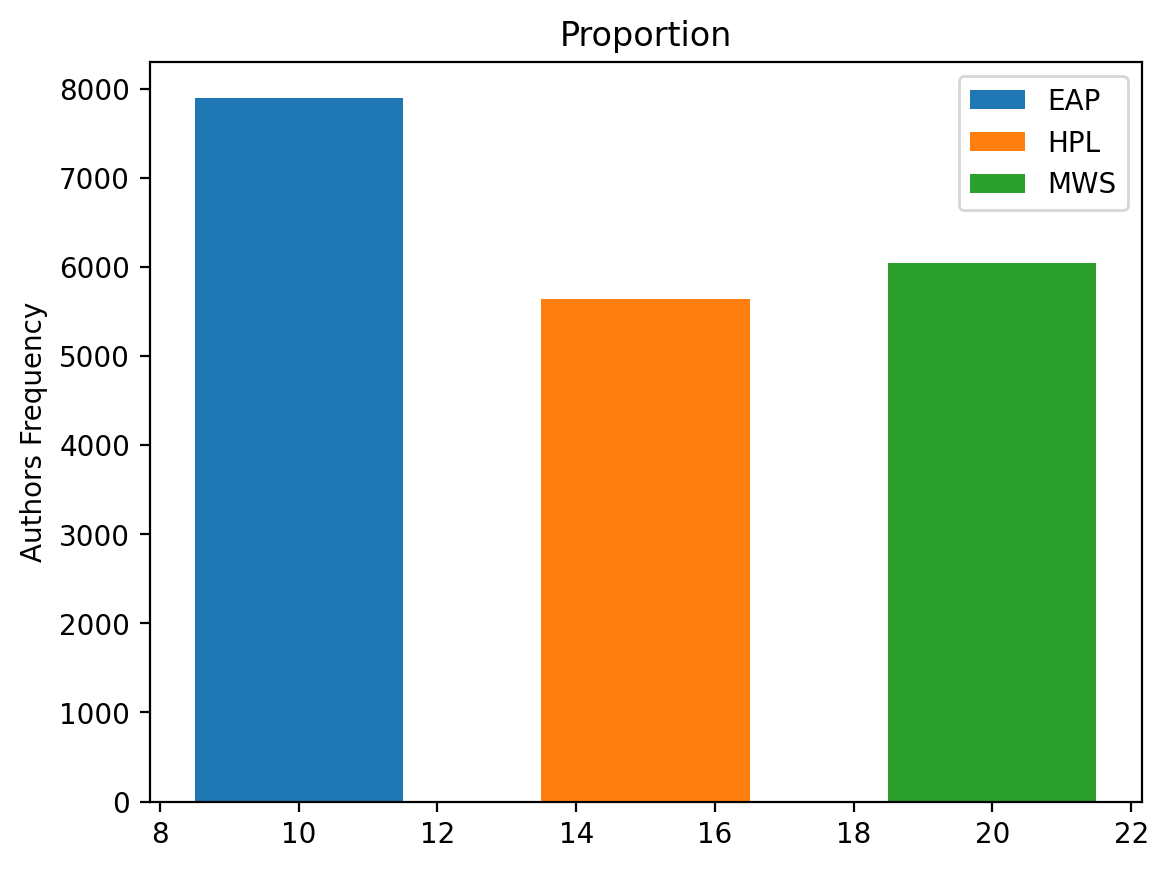

In [22]:
#Plot bar chart
plt.bar(10,EAP,3,label='EAP')
plt.bar(15,HPL,3,label='HPL')
plt.bar(20,MWS,3,label='MWS')
plt.legend()
plt.ylabel('Authors Frequency')
plt.title('Proportion')

##**Remove Punctuations**

In [28]:
def remove_punctuations(text):
  import string
  #replace punctuations with white space,
  #which in effect deletes punctuation marks
  translator = str.maketrans('','',string.punctuation)
  #return the text stripped of punctuation marks
  return text.translate(translator)

##**Apply the function to each examples**

In [29]:
df['text'] = df['text'].apply(remove_punctuations)
df.head(10)

,id,text,author
0,id26305,This process however afforded me no means of a...,EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,In his left hand was a gold snuff box from whi...,EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,Finding nothing else not even gold the Superin...,HPL
5,id22965,A youth passed in solitude my best years spent...,MWS
6,id09674,The astronomer perhaps at this point took refu...,EAP
7,id13515,The surcingle hung in ribands from my body,EAP
8,id19322,I knew that you could not say to yourself ster...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [31]:
df['text'].iloc[0]

'This process however afforded me no means of ascertaining the dimensions of my dungeon as I might make its circuit and return to the point whence I set out without being aware of the fact so perfectly uniform seemed the wall'

## **Removing stopwords**

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
sw = stopwords.words('english')

In [35]:
print(len(sw))

179


In [42]:
def stopword(text):
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  #join the list of words with space separator
  return " ".join(text)

In [44]:
df['text'] = df['text'].apply(stopword)
df.head(10)

,id,text,author
0,id26305,process however afforded means ascertaining di...,EAP
1,id17569,never occurred fumbling might mere mistake,HPL
2,id11008,left hand gold snuff box capered hill cutting ...,EAP
3,id27763,lovely spring looked windsor terrace sixteen f...,MWS
4,id12958,finding nothing else even gold superintendent ...,HPL
5,id22965,youth passed solitude best years spent gentle ...,MWS
6,id09674,astronomer perhaps point took refuge suggestio...,EAP
7,id13515,surcingle hung ribands body,EAP
8,id19322,knew could say stereotomy without brought thin...,EAP
9,id00912,confess neither structure languages code gover...,MWS


In [45]:
df['text'].iloc[0]

'process however afforded means ascertaining dimensions dungeon might make circuit return point whence set without aware fact perfectly uniform seemed wall'

## **Top words before stemming**

In [49]:
#Create count Vectorizer
count_vectorizer = CountVectorizer()
#Fit object on data
count_vectorizer.fit(df['text'])
#collect the vocabulary items used in vocab
dictionary = count_vectorizer.vocabulary_.items()

In [51]:
vocab =[]
counts=[]
# iterate through each vocab and count append the value to designated lists
for key,value in dictionary:
  vocab.append(key)
  counts.append(value)
#store the count in pandas dataframe with vocab as index
vocabs = pd.Series(counts,index=vocab).sort_values(ascending=False)


<BarContainer object of 10 artists>

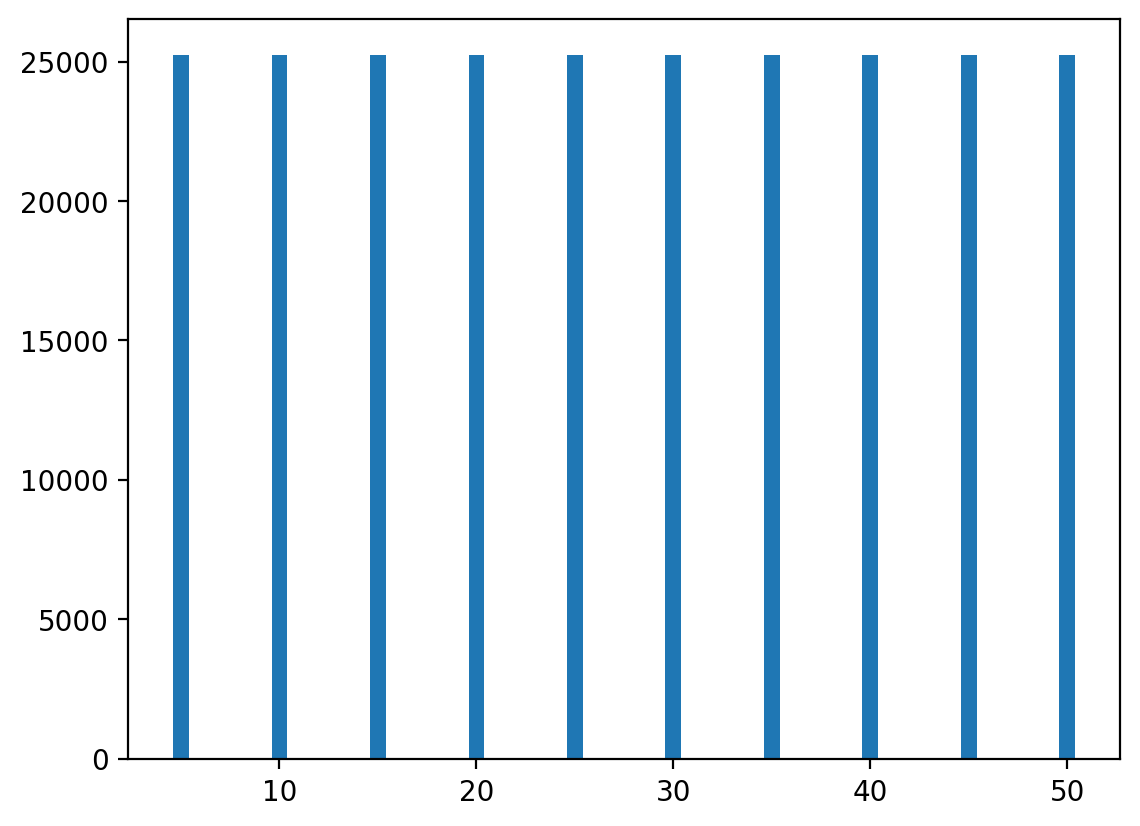

In [62]:
top_vocabs = vocabs.head(10)

plt.bar(np.linspace(5,50,10),top_vocabs[1])

<Axes: >

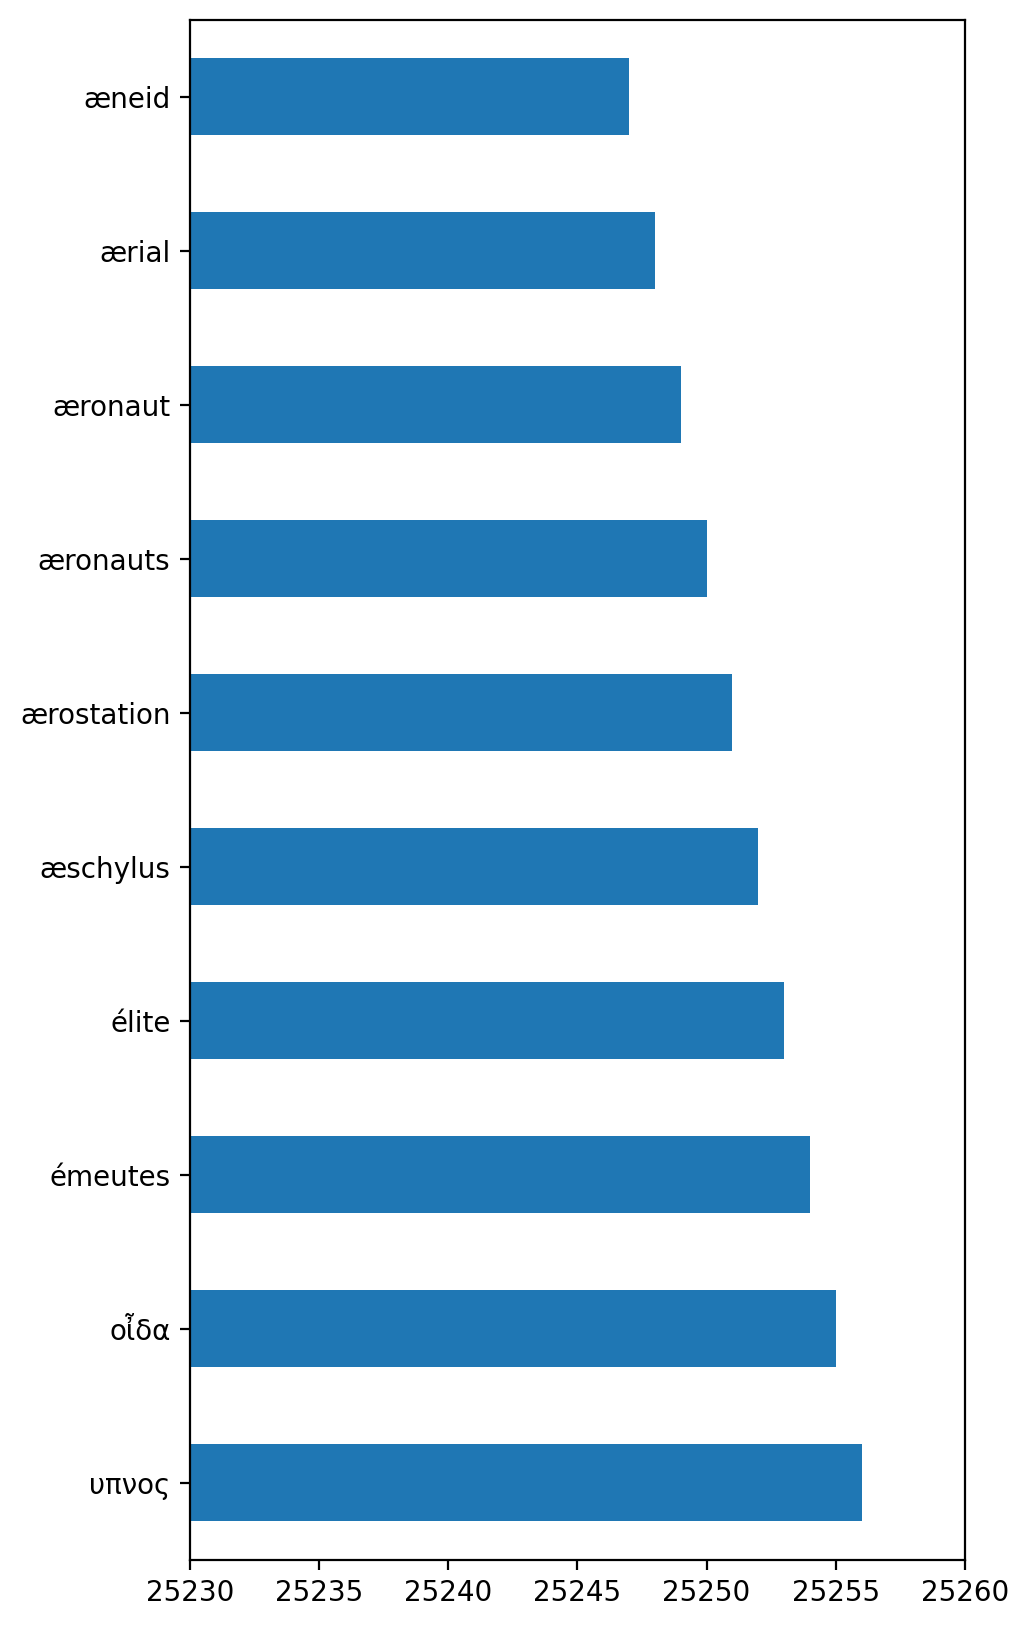

In [64]:
top_vocabs.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

##  **Stemming operations**

In [65]:
stemmer = SnowballStemmer('english')

def stemming(text):
  '''a function which stems each word in the given text'''
  text = [stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [68]:
df['text'] = df['text'].apply(stemming)
df['text'].iloc[0]

'process howev afford mean ascertain dimen dungeon might make circuit return point whenc set without awar fact perfect uniform seem wall'

## **Top words after stemming operation**

In [75]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df['text'])
dictionary = tfidf_vectorizer.vocabulary_.items()

In [77]:
#Bar plot
vocab=[]
counts=[]
for key,value in dictionary:
  vocab.append(key)
  counts.append(value)
# store the count in panadas dataframe with vocab as index
vocabs_after_stem =pd.Series(counts,index=vocab).sort_values(ascending=False)

<Axes: >

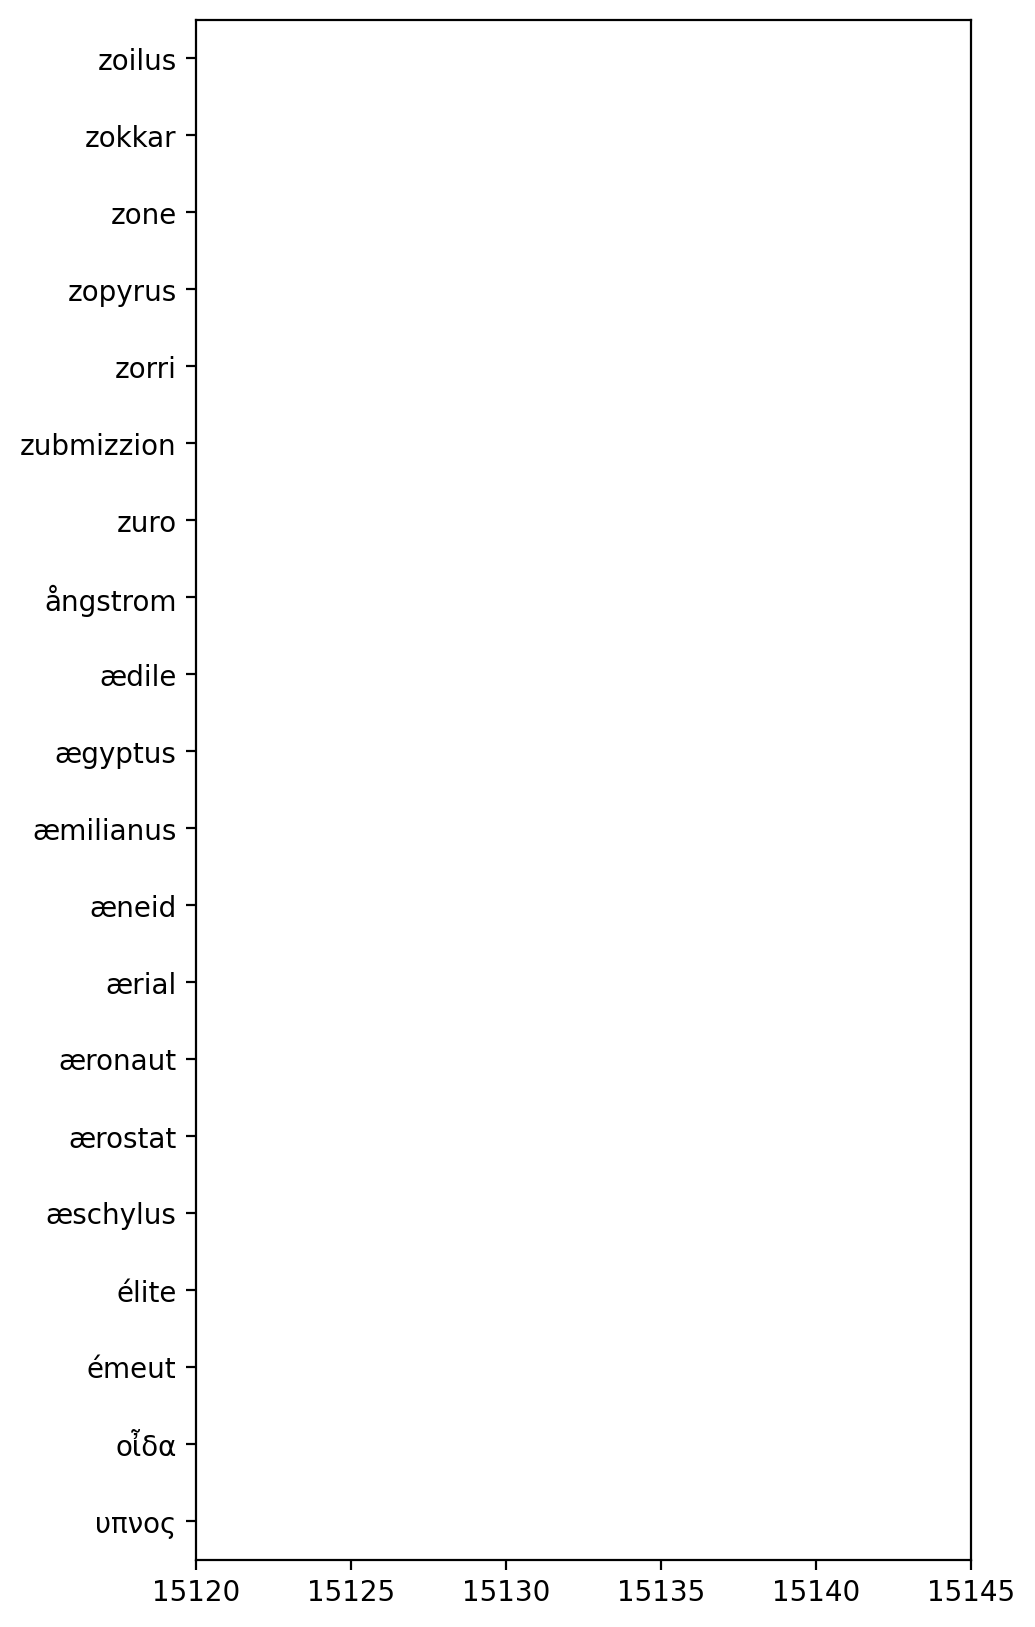

In [82]:
top_vacab = vocabs_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (15120, 15145))

# **Top words of each writer and their count**

In [85]:
EAP = df[df['author']=='EAP']
HPL = df[df['author']=='HPL']
MWS = df[df['author']=='MWS']

## **Edgar Allan Poe**

In [88]:
#Create the object for EAP_vector
EAP_tfid_vectorizer = TfidfVectorizer()
EAP_tfid_vectorizer.fit(EAP['text'])
EAP_dict = EAP_tfid_vectorizer.vocabulary_.items()

In [90]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in EAP_dict:
    vocab.append(key)
    count.append(value)
EAP_vocab = pd.Series(count,index=vocab).sort_values(ascending=False)


<Axes: >

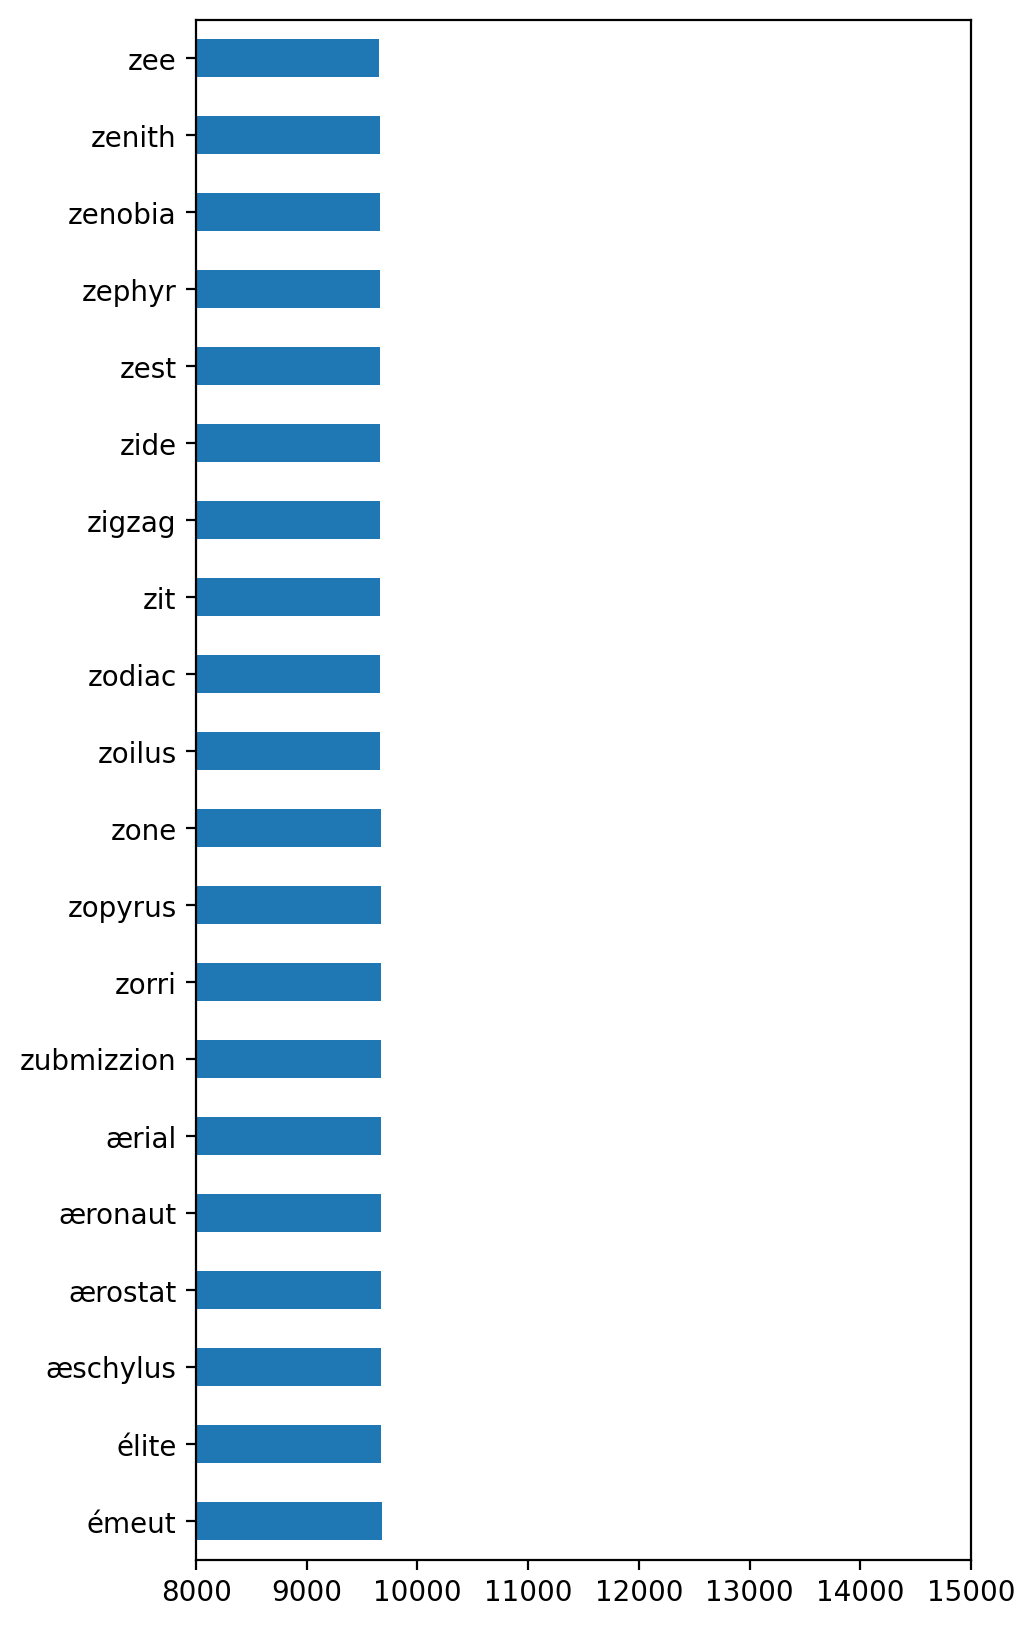

In [99]:
#Plot top Words
top_vocab = EAP_vocab.head(20)
top_vocab.plot(kind='barh',figsize=(5,10),xlim= (8000, 15000))

## **HP Lovecraft**

In [100]:
#Create the object for HPL_vector
HPL_tfid_vectorizer = TfidfVectorizer()
HPL_tfid_vectorizer.fit(HPL['text'])
HPL_dict = HPL_tfid_vectorizer.vocabulary_.items()

In [101]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in HPL_dict:
    vocab.append(key)
    count.append(value)
HPL_vocab = pd.Series(count,index=vocab).sort_values(ascending=False)


<Axes: >

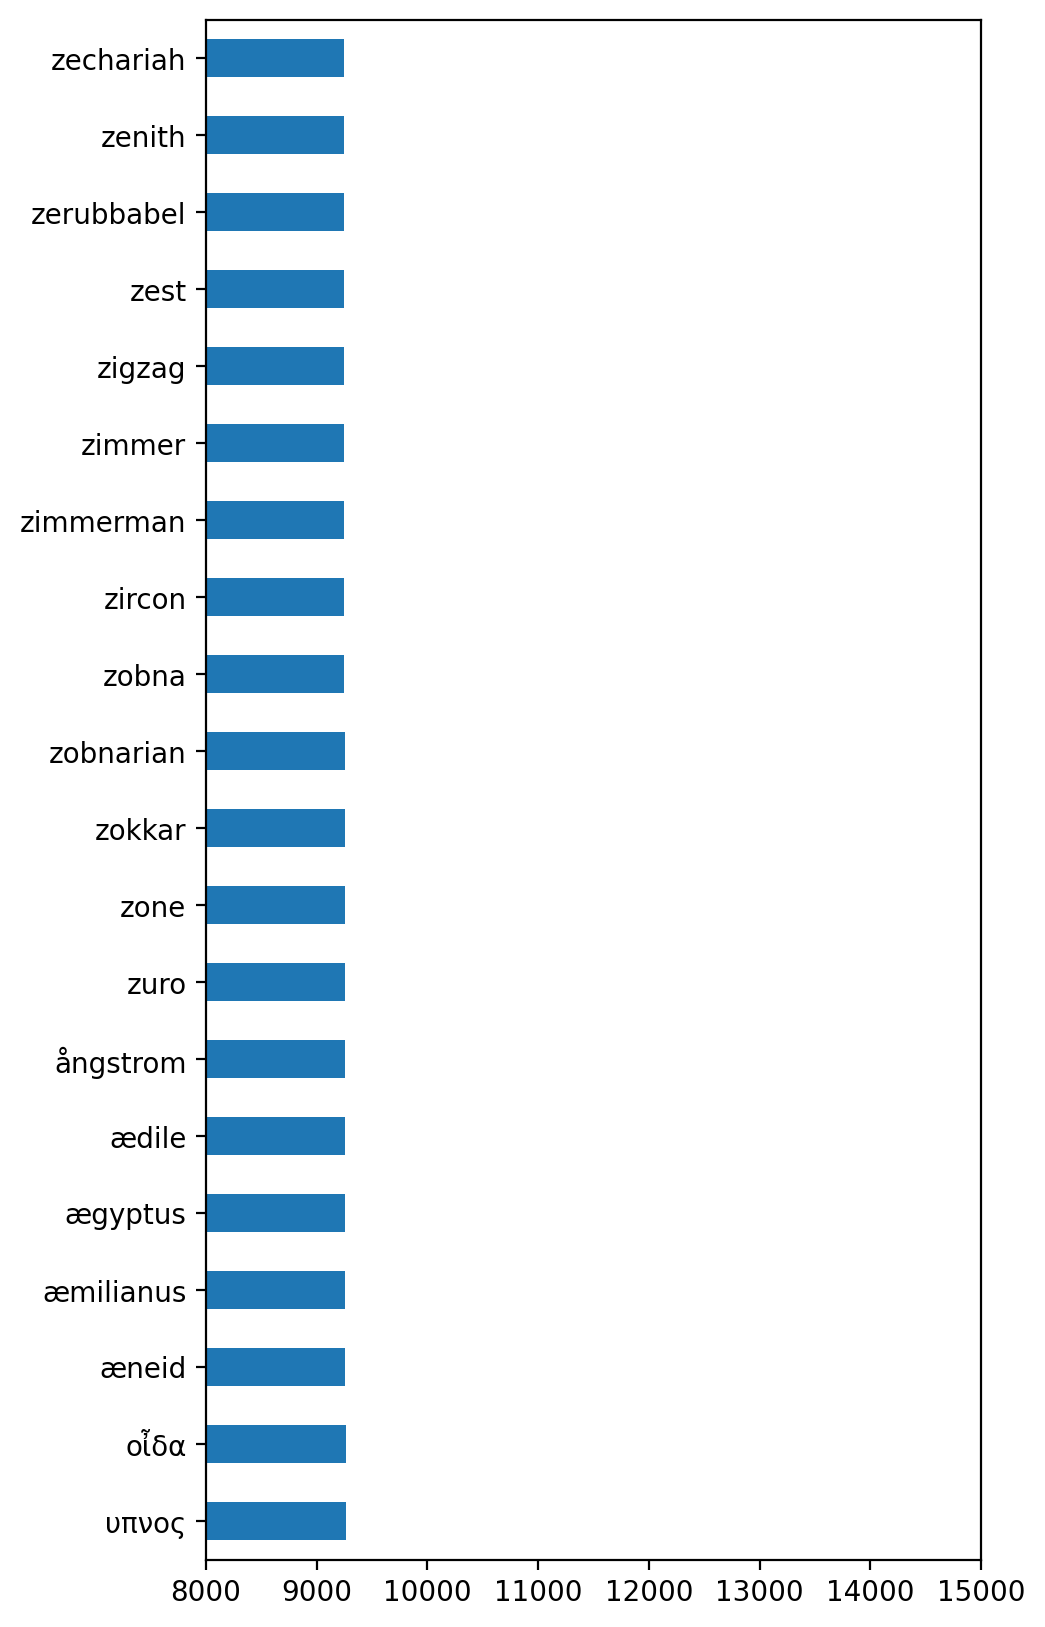

In [102]:
#Plot top Words
top_vocab = HPL_vocab.head(20)
top_vocab.plot(kind='barh',figsize=(5,10),xlim= (8000, 15000))

## **Mary Shelley**

In [103]:
#Create the object for HPL_vector
MWS_tfid_vectorizer = TfidfVectorizer()
MWS_tfid_vectorizer.fit(MWS['text'])
MWS_dict = MWS_tfid_vectorizer.vocabulary_.items()

In [104]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in HPL_dict:
    vocab.append(key)
    count.append(value)
MWS_vocab = pd.Series(count,index=vocab).sort_values(ascending=False)


<Axes: >

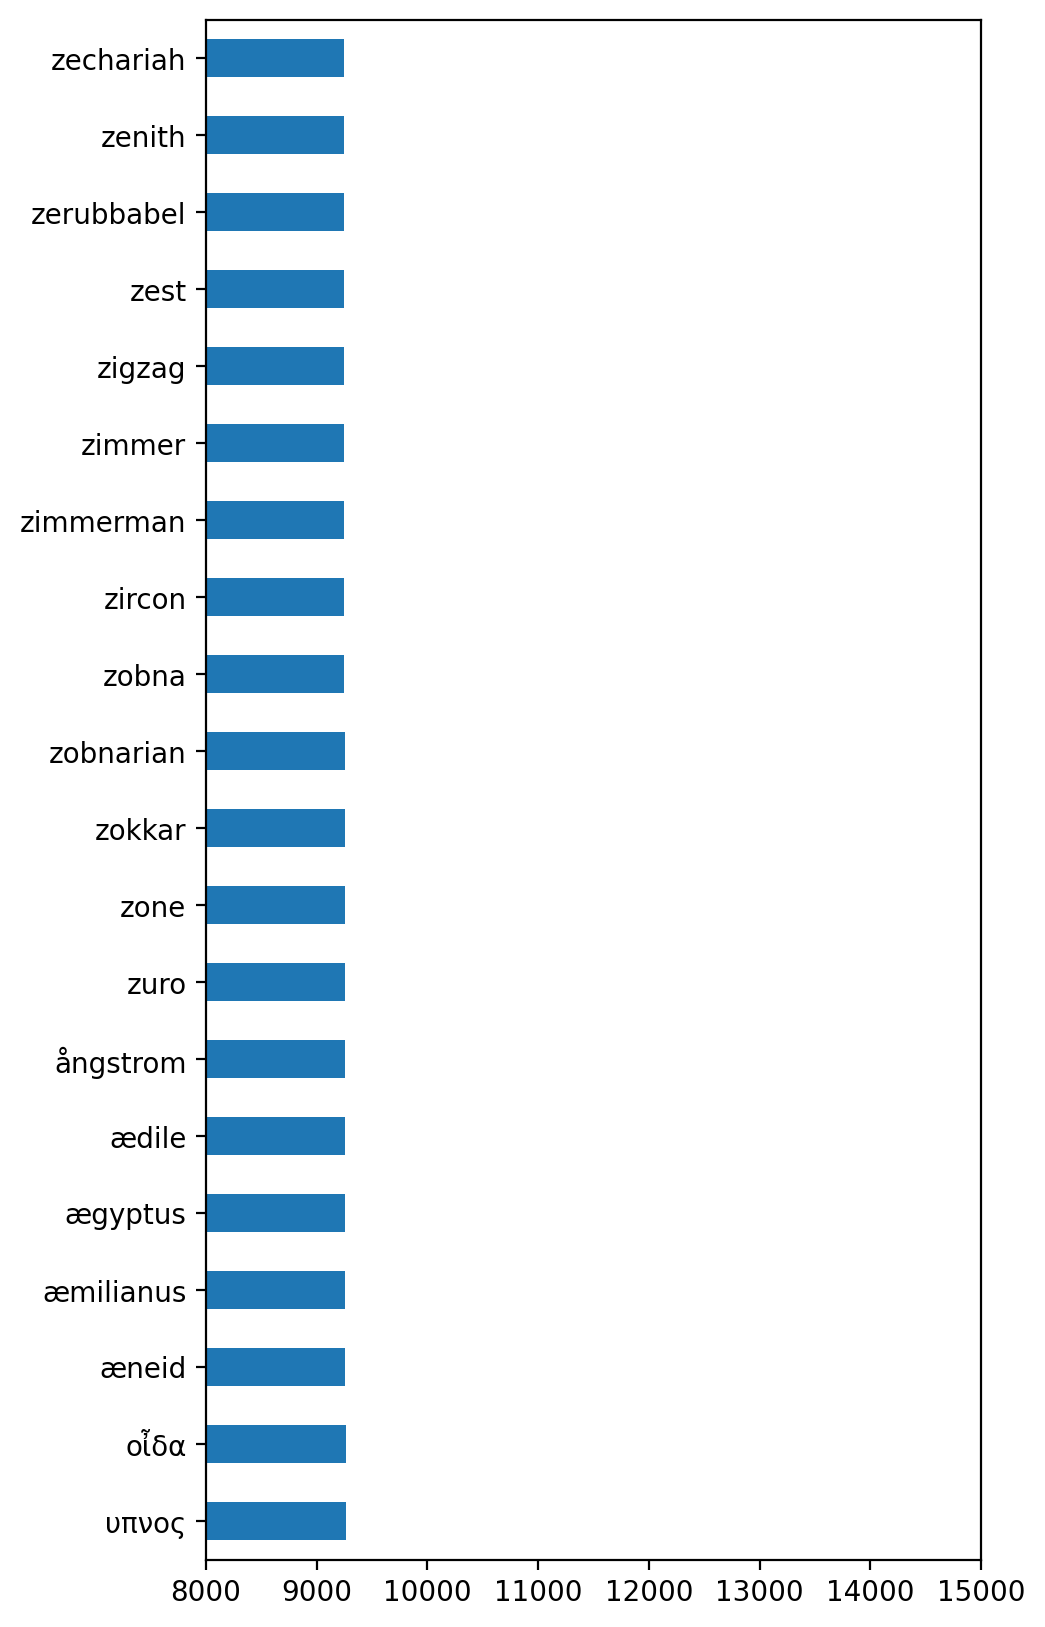

In [105]:
#Plot top Words
top_vocab = MWS_vocab.head(20)
top_vocab.plot(kind='barh',figsize=(5,10),xlim= (8000, 15000))